# Exam project: Predicting the quality of a purchased car

The aim of this project is to predict if a car purchased at the Auction is a good / bad buy. All the variables in the data set are defined below:

Field Name: &emsp;&emsp;&emsp;&emsp;                                              Definition <br>
RefID: &emsp;&emsp;&emsp;&emsp;		                                 		    Unique (sequential) number assigned to vehicles <br>
IsBadBuy: &emsp;&emsp;&emsp;&emsp;	                                 			Identifies if the kicked vehicle was an avoidable purchase <br>
PurchDate: &emsp;&emsp;&emsp;&emsp;	                                 			The Date the vehicle was Purchased at Auction <br>
Auction: &emsp;&emsp;&emsp;&emsp;	                                 			Auction provider at which the  vehicle was purchased<br>
VehYear: &emsp;&emsp;&emsp;&emsp;		                                 			The manufacturer's year of the vehicle<br>
VehicleAge: &emsp;&emsp;&emsp;&emsp;	                                 			The Years elapsed since the manufacturer's year<br>
Make: &emsp;&emsp;&emsp;&emsp;		      			Vehicle Manufacturer <br>
Model: &emsp;&emsp;&emsp;&emsp;		      			Vehicle Model<br>
Trim: &emsp;&emsp;&emsp;&emsp;		      			Vehicle Trim Level<br>
SubModel: &emsp;&emsp;&emsp;&emsp;	      			Vehicle Submodel<br>
Color: &emsp;&emsp;&emsp;&emsp;	      			Vehicle Color<br>
Transmission: &emsp;&emsp;&emsp;&emsp;      				Vehicles transmission type (Automatic, Manual)<br>
WheelTypeID: &emsp;&emsp;&emsp;&emsp;		  		The type id of the vehicle wheel<br>
WheelType: &emsp;&emsp;&emsp;&emsp;				The vehicle wheel type description (Alloy, Covers)<br>
VehOdo: &emsp;&emsp;&emsp;&emsp;					The vehicles odometer reading<br>
Nationality: &emsp;&emsp;&emsp;&emsp;				The Manufacturer's country<br>
Size: &emsp;&emsp;&emsp;&emsp;					The size category of the vehicle (Compact, SUV, etc.)<br>
TopThreeAmericanName: &emsp;&emsp;&emsp;&emsp;			Identifies if the manufacturer is one of the top three American manufacturers<br>
MMRAcquisitionAuctionAveragePrice: &emsp;&emsp;&emsp;&emsp;	 Acquisition price for this vehicle in average condition at time of purchase	<br>
MMRAcquisitionAuctionCleanPrice: &emsp;&emsp;&emsp;&emsp;		 Acquisition price for this vehicle in the above Average condition at time of purchase<br>
MMRAcquisitionRetailAveragePrice: &emsp;&emsp;&emsp;&emsp;	 Acquisition price for this vehicle in the retail market in average condition at time of purchase<br>
MMRAcquisitonRetailCleanPrice: &emsp;&emsp;&emsp;&emsp;		 Acquisition price for this vehicle in the retail market in above average condition at time of purchase<br>
MMRCurrentAuctionAveragePrice: &emsp;&emsp;&emsp;&emsp;		 Acquisition price for this vehicle in average condition as of current day	<br>
MMRCurrentAuctionCleanPrice: &emsp;&emsp;&emsp;&emsp;		 Acquisition price for this vehicle in the above condition as of current day<br>
MMRCurrentRetailAveragePrice: &emsp;&emsp;&emsp;&emsp;		 Acquisition price for this vehicle in the retail market in average condition as of current day<br>
MMRCurrentRetailCleanPrice: &emsp;&emsp;&emsp;&emsp;		 Acquisition price for this vehicle in the retail market in above average condition as of current day<br>
PRIMEUNIT: &emsp;&emsp;&emsp;&emsp;				 Identifies if the vehicle would have a higher demand than a standard purchase<br>
AcquisitionType: &emsp;&emsp;&emsp;&emsp;				 Identifies how the vehicle was aquired (Auction buy, trade in, etc)<br>
AUCGUART: &emsp;&emsp;&emsp;&emsp;				 The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)<br>
KickDate: &emsp;&emsp;&emsp;&emsp;				 Date the vehicle was kicked back to the auction<br>
BYRNO: &emsp;&emsp;&emsp;&emsp;					 Unique number assigned to the buyer that purchased the vehicle<br>
VNZIP: &emsp;&emsp;&emsp;&emsp;                                   Zipcode where the car was purchased<br>
VNST: &emsp;&emsp;&emsp;&emsp;                                    State where the car was purchased<br>
VehBCost: &emsp;&emsp;&emsp;&emsp;				 Acquisition cost paid for the vehicle at time of purchase<br>
IsOnlineSale: &emsp;&emsp;&emsp;&emsp;				 Identifies if the vehicle was originally purchased online<br>
WarrantyCost: &emsp;&emsp;&emsp;&emsp;                           Warranty price (term=36month  and millage=36K) <br>


The data contains missing values The dependent variable (IsBadBuy) is binary. There are 32 Independent variables. The data set is split to 60% training and 40% testing. 

In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import sklearn module for Machine Learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.metrics import accuracy_score, classification_report,precision_score, \
recall_score,precision_recall_curve,roc_auc_score,confusion_matrix,roc_curve

In [2]:
# load data
train = pd.read_csv('training.csv').set_index('RefId')
test = pd.read_csv('test.csv').set_index('RefId')

train['split'] = 'train'
test['split'] = 'test'

data = train.copy()
data.head()

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,split
RefId,,,,,,,,,,,,,,,,,,,,,
326,1,10/25/2010,ADESA,2008,2,KIA,SPECTRA,EX,4D SEDAN EX,BLUE,...,10650.0,NaN,NaN,5546,33619,FL,6100.0,0,533,train
42991,0,5/27/2009,MANHEIM,2006,3,DODGE,STRATUS V6 2.7L V6 M,SXT,4D SEDAN SXT FFV,SILVER,...,7478.0,NaN,NaN,99750,32124,FL,4000.0,0,1630,train
55273,0,3/18/2010,OTHER,2008,2,DODGE,CALIBER,SE,4D WAGON,BLACK,...,11350.0,NaN,NaN,99761,74135,OK,7500.0,0,693,train
29058,0,6/8/2009,OTHER,2005,4,FORD,FREESTAR FWD V6 3.9L,S,PASSENGER 3.9L,BROWN,...,7691.0,NaN,NaN,99761,85018,AZ,4725.0,0,1633,train
34991,0,3/4/2009,MANHEIM,2005,4,CHRYSLER,TOWN & COUNTRY FWD V,Bas,MINIVAN 3.3L,BLUE,...,7856.0,NaN,NaN,20833,75236,TX,5670.0,0,1623,train


## To begin, let's do some exploratory data analysis

In [3]:
print("Dataset size: ",len(data))
print('Missing values in each column: \n', data.isnull().sum())

Dataset size:  58386
Missing values in each column: 
 IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1911
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2573
WheelType                             2577
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          245


In [4]:
# print the size of each class in the dependent binary IsBadBuy variable
print(train.groupby("IsBadBuy").size())

IsBadBuy
0    51178
1     7208
dtype: int64


In [5]:
# obtain a rough picture of correlations between the variables in the dataset
corr = data.corr()
corr.style.background_gradient()

,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
IsBadBuy,1,-0.156926,0.165325,-0.0476933,0.0828581,-0.105793,-0.0993145,-0.0845135,-0.0807117,-0.10613,-0.101036,-0.100786,-0.0971951,-0.0594116,0.00639286,-0.0981321,-0.0039694,0.050259
VehYear,-0.156926,1,-0.958049,0.261366,-0.283569,0.582416,0.533807,0.582414,0.540206,0.591968,0.549345,0.599415,0.559579,0.281799,0.0699759,0.349672,0.0573158,-0.267739
VehicleAge,0.165325,-0.958049,1,-0.252018,0.318778,-0.567106,-0.519897,-0.462299,-0.427526,-0.576914,-0.533646,-0.505322,-0.47064,-0.269907,-0.0766166,-0.311903,-0.0246593,0.257996
WheelTypeID,-0.0476933,0.261366,-0.252018,1,-0.212432,-0.0946579,-0.129608,-0.0717364,-0.101796,-0.0867982,-0.120046,-0.0726838,-0.10125,0.189817,0.0078462,-0.160986,-0.0113645,-0.133688
VehOdo,0.0828581,-0.283569,0.318778,-0.212432,1,-0.0183812,0.0237172,0.0291065,0.0614072,-0.0301414,0.010755,0.0137187,0.0460697,-0.29223,-0.0535469,-0.0644356,0.0309944,0.411273
MMRAcquisitionAuctionAveragePrice,-0.105793,0.582416,-0.567106,-0.0946579,-0.0183812,1,0.990218,0.910185,0.909832,0.937482,0.931919,0.87122,0.870424,0.108806,0.047112,0.789354,0.0380292,-0.0496823
MMRAcquisitionAuctionCleanPrice,-0.0993145,0.533807,-0.519897,-0.129608,0.0237172,0.990218,1,0.902339,0.917934,0.923144,0.931599,0.860055,0.870604,0.0628181,0.0418103,0.781123,0.0378963,-0.0196073
MMRAcquisitionRetailAveragePrice,-0.0845135,0.582414,-0.462299,-0.0717364,0.0291065,0.910185,0.902339,1,0.990085,0.85133,0.848776,0.912747,0.905523,0.107988,0.0364019,0.745718,0.0797667,-0.0535073
MMRAcquisitonRetailCleanPrice,-0.0807117,0.540206,-0.427526,-0.101796,0.0614072,0.909832,0.917934,0.990085,1,0.846393,0.854986,0.90268,0.906231,0.0698573,0.0321199,0.744622,0.0767349,-0.0267079
MMRCurrentAuctionAveragePrice,-0.10613,0.591968,-0.576914,-0.0867982,-0.0301414,0.937482,0.923144,0.85133,0.846393,1,0.990244,0.915147,0.912305,0.112075,0.0517059,0.778253,0.0395132,-0.056893


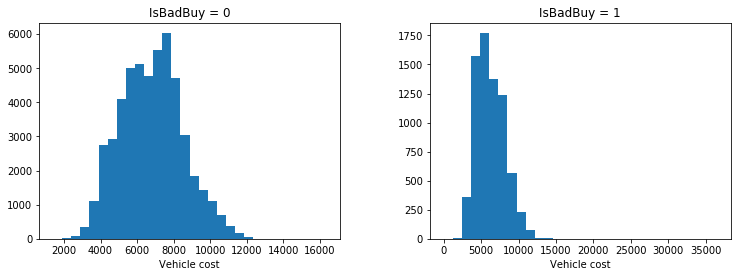

In [6]:
# plot histograms of vehicle cost, broken down by the IsBadBuy variable
fig, ax = plt.subplots(1, 2, figsize = (12,4))
data['VehBCost'].hist(by=data['IsBadBuy'], bins=30, xrot=360, ax=ax)
ax[0].set_title("IsBadBuy = 0")
ax[1].set_title("IsBadBuy = 1")
ax[0].set_xlabel("Vehicle cost")
ax[1].set_xlabel("Vehicle cost")
plt.show()

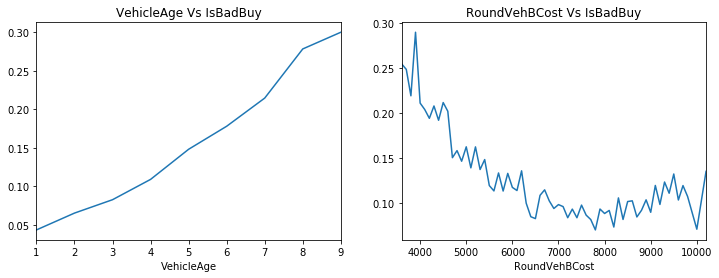

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))

#plot VehicleAge vs. IsBadBuy
data.groupby('VehicleAge').agg([np.mean,np.size])['IsBadBuy'].query('size > 250')['mean'].plot(ax=ax[0],title = "VehicleAge Vs IsBadBuy")

# create new variable essentially rounding the vehicle cost to the last two digits
data2 = data.copy()
data2['RoundVehBCost'] = round(data['VehBCost'],-2)

# plot the rounded vehicle cost vs. IsBadBuy
data2.groupby('RoundVehBCost').agg([np.mean,np.size])['IsBadBuy'].query('size > 250')['mean'].plot(ax=ax[1], title = "RoundVehBCost Vs IsBadBuy")
plt.show()

#### We see that, as intuitively expected, the vehicle age increases the probability of a car being a bad buy, while the vehicle cost decreases this probability.

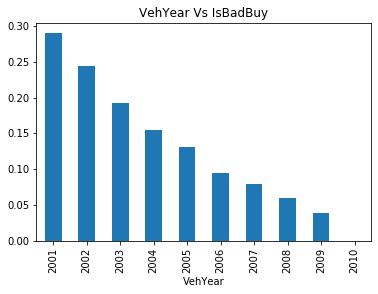

In [8]:
# create a bar plot of the probability of a bad buy by vehicle year
data.groupby("VehYear").mean()["IsBadBuy"].plot.bar(title = "VehYear Vs IsBadBuy")
plt.show()

#### Again, as expected, we see that vehicle year is strongly indicative of a bad buy.

#### Let's look at how the vehicle manufacturer is related to the probability of a bad buy:

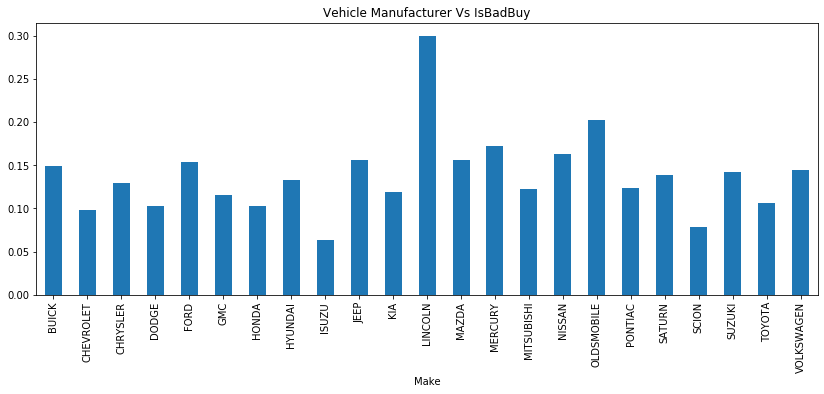

In [9]:
data.groupby('Make').agg([np.mean,np.size])['IsBadBuy'].\
    query('size > 50')['mean'].plot.bar(figsize=(14,5), title = "Vehicle Manufacturer Vs IsBadBuy")
plt.show()

#### Let's do the same for Wheeltype:

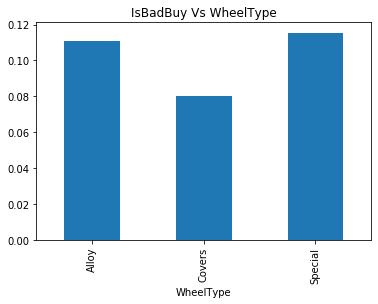

In [10]:
data.groupby('WheelType').mean()['IsBadBuy'].plot.bar(title = "IsBadBuy Vs WheelType")
plt.show()

#### The same for the state where the care was purchased:

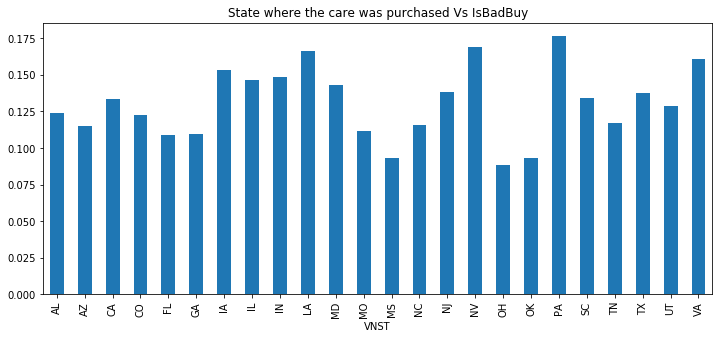

In [11]:
data.groupby('VNST').agg([np.mean,np.size])['IsBadBuy'].\
                    query('size > 250')['mean'].plot.bar(figsize=(12,5), title = "State where the care was purchased Vs IsBadBuy")
plt.show()

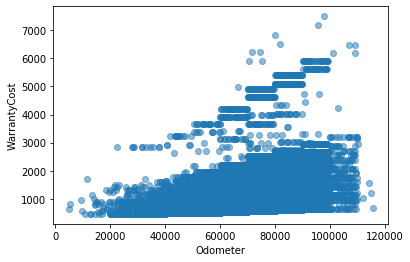

In [12]:
# plot odometer reading vs WarrantyCost
plt.scatter(data['VehOdo'], data['WarrantyCost'], alpha=0.5)
plt.xlabel('Odometer')
plt.ylabel('WarrantyCost')
plt.show()

## Machine Learning models for good/bad buy prediction 

Let's create a function that will carry out the following well-known ML algorithms, in increasing complexity:

* Logistic Regression
* Random Forest Classifier
* XGBoost

In [13]:
def ml_models(x_train,y_train):
    models = {}
    logreg = LogisticRegression(class_weight='balanced',random_state=25)
    randfor = RandomForestClassifier(n_estimators=75,max_features=5,max_depth=20,
                                min_samples_split=100,class_weight='balanced',random_state=25)
    xgboost = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, 
                           learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10,random_state=25)
    
    models["LogisticRegression"] = logreg
    models["RandomForest"] = randfor
    models["XGBoost"] = xgboost
    
    for m,n in models.items():
        n.fit(x_train, y_train)
        models[m]=n
    return models

#### Train the models on a k = 10-fold cross validation and compute AUC.

In [14]:
def cross_validation(models,x_train,y_train,k_fold,metric):
    AUC = {}
    for m,n in models.items():    
        model_results = model_selection.cross_val_score(n, x_train,y_train, cv=k_fold, scoring=metric)
        mean_auc = model_results.mean()
        std = model_results.std()
        # print out the mean and standard deviation of the training score 
        print('The model {} has AUC {} and STD {}.'.format(m, mean_auc, std))
        AUC[m] = mean_auc
    return AUC

#### Let's compute model accuracy, display confusion matrix and plot ROC curves.

In [15]:
def show_results(model, AUC , x_test, y_test):  
    
        print ('-------------- Model Summary --------------')
        print("\n")
        
        plt.figure()
        
        for m,n in model.items():
            
            model_predicted = n.predict(x_test)
            print ('Model accuracy for {} = {}'.format(m, accuracy_score(y_test,model_predicted)))
            print("\n")
            
            model_roc_auc = roc_auc_score(y_test, model_predicted)
            print ('Model ROC AUC for {} = {}'.format(m,model_roc_auc))
            print("\n")
            print(classification_report(y_test, model_predicted))
            print("\n")
            
            model_matrix = confusion_matrix(y_test, model_predicted)
            print('Confusion Matrix for model {} : \n {}'.format(m,model_matrix))
            print("\n")

            false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, n.predict_proba(x_test)[:,1])           
            # plot ROC
            plt.plot(false_positive_rate, true_positive_rate, label='%s (area = %0.2f)' % (m, AUC[m]))
        
        # plot Base Rate ROC
        plt.plot([0,1], [0,1],label='Base Rate')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Plot')
        plt.legend(loc="lower right")
        plt.show()

#### Let's get the feature importances for the three ML models

In [16]:
def get_feature_importance(models,x_train):
    for m, n in models.items():
        if hasattr(n, 'feature_importances_'):
            feature_importances = pd.DataFrame(n.feature_importances_,
                                       index = x_train.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
            feature_importances = feature_importances.reset_index()
            print("Feature importances for model {} are \n {}".format(m, feature_importances))
            feature_importances.plot.bar()
            plt.show()    
        else:
            print("Feature importances unavailable for model", m)

### Before we move on, let's define some data preprocessing functions we will have to use for feeding the ML models the correct input

#### First, let's split the variables in the dataset into categorical and continuous variables.

In [17]:
def split_categ_contin_cols(df, columns):
    categ_cols = []
    contin_cols = []
    for col in columns:
        if df[col].dtype == 'object':
            categ_cols.append(col)
        else:
            contin_cols.append(col)
    return categ_cols,contin_cols

#### Then, fill missing values with appropirate values for categorical and continuos features.

In [18]:
def fillNAvalues(df, null_categcols, null_contincols):
    
    df_nullcategcols =  df[null_categcols].fillna('NA')
    df_nullcontincols = df[null_contincols]
    
    #impute with mean value
    df_nullcontincols.fillna(df_nullcontincols.mean(),inplace=True)
    
    columns = list(set(df.columns) - set(null_categcols) - set(null_contincols))
    df_fillna = pd.concat([df[columns], df_nullcategcols, df_nullcontincols], axis=1)
    return df_fillna

#### Next, let's find null and duplicate values from the dataframe.

In [19]:
def findNullVals(df): 
    
    null_categcol = []
    null_contincol = []
    
    null_vals = df.isnull().sum().sort_values()
    
    df_null = pd.DataFrame({'nullcols' : null_vals.index, 'countval' : null_vals.values})
    df_null = df_null[df_null.countval > 0]
    
    print ("Null variables with values :", df_null)
    print ("Duplicateged values :", df_null.duplicated().sum())
    
    nullcolumns = list(df_null.nullcols)
    null_categcol, null_contincol = split_categ_contin_cols(df,df_null.nullcols)
    
    return null_categcol, null_contincol

#### Next, let's define a function that will find outliers in continuous variables and normalize all variables into the log scale.

In [20]:
def find_outliers_scale(df,columns):
    
    for col in columns:
        
        # get variable stats
        stats = df[col].describe()
        
        IQR = stats['75%'] - stats['25%']
        upper = stats['75%'] + 1.5 * IQR
        lower = stats['25%'] - 1.5 * IQR
        
        print('The upper and lower bounds of {} for candidate outliers are {} and {}.'.format(col, upper, lower))
        print("Values less than lower bound : " , len(df[df[col] < lower]))
        print("Values greater than upper  bound : ", len(df[df[col] > upper]))
        
        # convert to log scale
        df[col]=np.log1p(df[col])
        
    return df[columns]

#### Finally, let's encode labels for categorical variables using sklearn's preprocessing module.

In [21]:
def label_encode(df, columns):
    
    label_enc = preprocessing.LabelEncoder()
    for col in columns:
        df[col] = np.log1p(label_enc.fit_transform(df[col]))
        
    return df[columns]

In [22]:
# drop redundant columns
data_dropped = data.drop(['AUCGUART','PRIMEUNIT','Nationality','VNZIP1','VNST',\
                        'BYRNO','WheelTypeID','PurchDate','VehYear'],axis=1)

all_columns = data_dropped.columns
categcols, contincols =  split_categ_contin_cols(data_dropped, all_columns)    
print ("Categorical columns: ", categcols)
print("\n")

uid = ['RefId']
target = ['IsBadBuy']

contincols = list(set(contincols) - set(uid) - set(target))
features = categcols + contincols 
print ("Continuous variables after target and id removal: ", contincols)
print("\n")

# some manual overwriting of column names and NA values
data_dropped.Transmission[data_dropped.Transmission == 'Manual'] = 'MANUAL'
data_dropped.Color[data_dropped.Color == 'NOT AVAIL'] = 'NA'
data_dropped.Color[data_dropped.Color == 'OTHER'] = 'NA'
data_dropped.TopThreeAmericanName[data_dropped.TopThreeAmericanName == 'OTHER'] = 'NA'

null_categ_cols, null_contin_cols = findNullVals(data_dropped)
data_dropped_new = fillNAvalues(data_dropped, null_categ_cols, null_contin_cols)

Categorical columns:  ['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelType', 'Size', 'TopThreeAmericanName', 'split']


Continuous variables after target and id removal:  ['MMRAcquisitionRetailAveragePrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentRetailCleanPrice', 'MMRAcquisitionAuctionAveragePrice', 'VehBCost', 'MMRAcquisitionAuctionCleanPrice', 'IsOnlineSale', 'MMRCurrentRetailAveragePrice', 'VehOdo', 'WarrantyCost', 'VehicleAge', 'MMRCurrentAuctionCleanPrice', 'MMRAcquisitonRetailCleanPrice']


Null variables with values :                              nullcols  countval
10               TopThreeAmericanName         4
11                               Size         4
12                           SubModel         7
13                              Color         7
14                       Transmission         8
15  MMRAcquisitionAuctionAveragePrice        13
16    MMRAcquisitionAuctionCleanPrice        13
17      MMRAcquisitonRetailCleanPrice        1

C:\Users\gevor\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\gevor\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\gevor\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\gevor\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value i

### Finally, let's run the three models we have built:

In [23]:
# find outliers and scale the continuous variables
data_contin = find_outliers_scale(data_dropped_new, contincols)
# encode labels for the categorical variables
data_categ = label_encode(data_dropped_new, categcols)

data_train = pd.concat([data_categ, data_contin, data_dropped_new[target]], axis=1)

# get the train and test splits
x_train, x_test, y_train, y_test = train_test_split(data_train[features],data_train[target],test_size=0.2,random_state=7)
kfold = model_selection.KFold(n_splits=10)
metric = 'roc_auc'

models = ml_models(x_train, y_train)
model_auc = cross_validation(models, x_train, y_train, kfold, metric)

The upper and lower bounds of MMRAcquisitionRetailAveragePrice for candidate outliers are 17205.0 and -275.0.
Values less than lower bound :  0
Values greater than upper  bound :  247
The upper and lower bounds of MMRCurrentAuctionAveragePrice for candidate outliers are 12907.5 and -888.5.
Values less than lower bound :  0
Values greater than upper  bound :  461
The upper and lower bounds of MMRCurrentRetailCleanPrice for candidate outliers are 19064.5 and 1044.5.
Values less than lower bound :  394
Values greater than upper  bound :  350
The upper and lower bounds of MMRAcquisitionAuctionAveragePrice for candidate outliers are 13001.5 and -962.5.
Values less than lower bound :  0
Values greater than upper  bound :  422
The upper and lower bounds of VehBCost for candidate outliers are 11605.0 and 1725.0.
Values less than lower bound :  5
Values greater than upper  bound :  141
The upper and lower bounds of MMRAcquisitionAuctionCleanPrice for candidate outliers are 14425.0 and 1.0.
Valu

C:\Users\gevor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gevor\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gevor\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\gevor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gevor\Anaconda3\lib\site-

The model LogisticRegression has AUC 0.68814091172429 and STD 0.013346010369427138.


C:\Users\gevor\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gevor\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gevor\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gevor\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

The model RandomForest has AUC 0.7564910927181913 and STD 0.011895178491731224.


C:\Users\gevor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gevor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gevor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gevor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

The model XGBoost has AUC 0.7346201171972389 and STD 0.01122953422926692.


#### Let's check out the model summaries and the ROC curves:

-------------- Model Summary --------------


Model accuracy for LogisticRegression = 0.6479705429011817


Model ROC AUC for LogisticRegression = 0.636379601660292


              precision    recall  f1-score   support

           0       0.92      0.65      0.76     10240
           1       0.20      0.62      0.30      1438

    accuracy                           0.65     11678
   macro avg       0.56      0.64      0.53     11678
weighted avg       0.84      0.65      0.71     11678



Confusion Matrix for model LogisticRegression : 
 [[6674 3566]
 [ 545  893]]


Model accuracy for RandomForest = 0.8331049837300908


Model ROC AUC for RandomForest = 0.6705143998826495


              precision    recall  f1-score   support

           0       0.92      0.89      0.90     10240
           1       0.36      0.45      0.40      1438

    accuracy                           0.83     11678
   macro avg       0.64      0.67      0.65     11678
weighted avg       0.85      0.83      0.84  

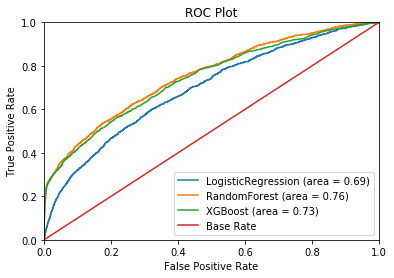

In [24]:
show_results(models, model_auc, x_test, y_test)

#### Let's also see the feature importance rankings

Feature importances unavailable for model LogisticRegression
Feature importances for model RandomForest are 
                                 index  importance
0                           WheelType    0.260195
1                            VehBCost    0.063660
2                              VehOdo    0.061660
3                          VehicleAge    0.061259
4       MMRCurrentAuctionAveragePrice    0.054571
5         MMRCurrentAuctionCleanPrice    0.052217
6   MMRAcquisitionAuctionAveragePrice    0.051832
7     MMRAcquisitionAuctionCleanPrice    0.049321
8        MMRCurrentRetailAveragePrice    0.042204
9    MMRAcquisitionRetailAveragePrice    0.040455
10      MMRAcquisitonRetailCleanPrice    0.039955
11         MMRCurrentRetailCleanPrice    0.038161
12                       WarrantyCost    0.033108
13                           SubModel    0.029621
14                              Model    0.028395
15                               Trim    0.021077
16                               Make   

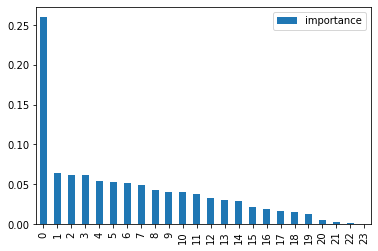

Feature importances for model XGBoost are 
                                 index  importance
0                           WheelType    0.624252
1                             Auction    0.119729
2                          VehicleAge    0.077761
3     MMRAcquisitionAuctionCleanPrice    0.035872
4                            VehBCost    0.027963
5         MMRCurrentAuctionCleanPrice    0.021132
6   MMRAcquisitionAuctionAveragePrice    0.014168
7        MMRCurrentRetailAveragePrice    0.012077
8    MMRAcquisitionRetailAveragePrice    0.011031
9                              VehOdo    0.009928
10                       Transmission    0.007939
11                       IsOnlineSale    0.007332
12      MMRAcquisitonRetailCleanPrice    0.006413
13      MMRCurrentAuctionAveragePrice    0.005746
14                       WarrantyCost    0.004261
15                               Make    0.003316
16                               Trim    0.003104
17               TopThreeAmericanName    0.003085
18    

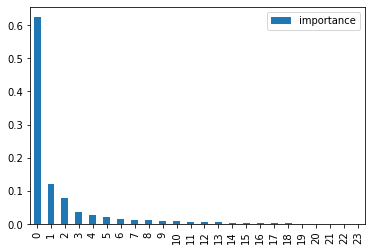

In [25]:
get_feature_importance(models, x_train)

As we can see, the models, despite their simplicity and no hyperparameter tuning, show good results.
The most important features, as seen from the plots above, are

* Wheel type
* the Auction at which the car was purchased
* Vehicle age
* Vehicle cost
* Vehicle Odometer reading
* MMRCurrentAuctionCleanPrice    